In [2]:
options(warn=-1)

In [3]:
library(tidyr)
library(dplyr)
library(hyperSpec)
library(ggplot2)
library(ggrepel)
library(patchwork)

#### Load spectra dataframe

In [4]:
spc <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))
head(spc)

,vial,397.307,401.164,405.022,408.879,412.736,416.594,420.451,424.308,428.166,⋯,dim_da,dim_ket,dim_mast,met_in,da_in,ket_in,mast_in,disease_in,disease_min,disease
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,JM006 1000,-0.07326907,1,1,1,-0.1279949,-0.1188428,-0.1338351,14.81902,-0.1274847,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
2,JM006 1002,0.04021398,1,1,1,14.9473063,0.1117955,14.7098770,14.71823,14.7977676,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
3,JM006 1003,15.05952360,1,1,1,0.8254424,0.1740542,14.9310503,14.90867,0.2375899,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
4,JM006 1004,15.64211768,1,1,1,14.8384736,0.1018710,14.8572984,14.94703,0.2181086,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
5,JM006 1005,14.67025372,1,1,1,14.8736669,14.5768853,14.6524259,14.83394,15.0828729,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
6,JM006 1006,0.35748126,1,1,1,15.1296417,14.8059751,14.8534811,14.84384,14.9129939,⋯,NA,NA,16,NA,NA,NA,12,12,16,1


#### Identify potential outliers in Disease group

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


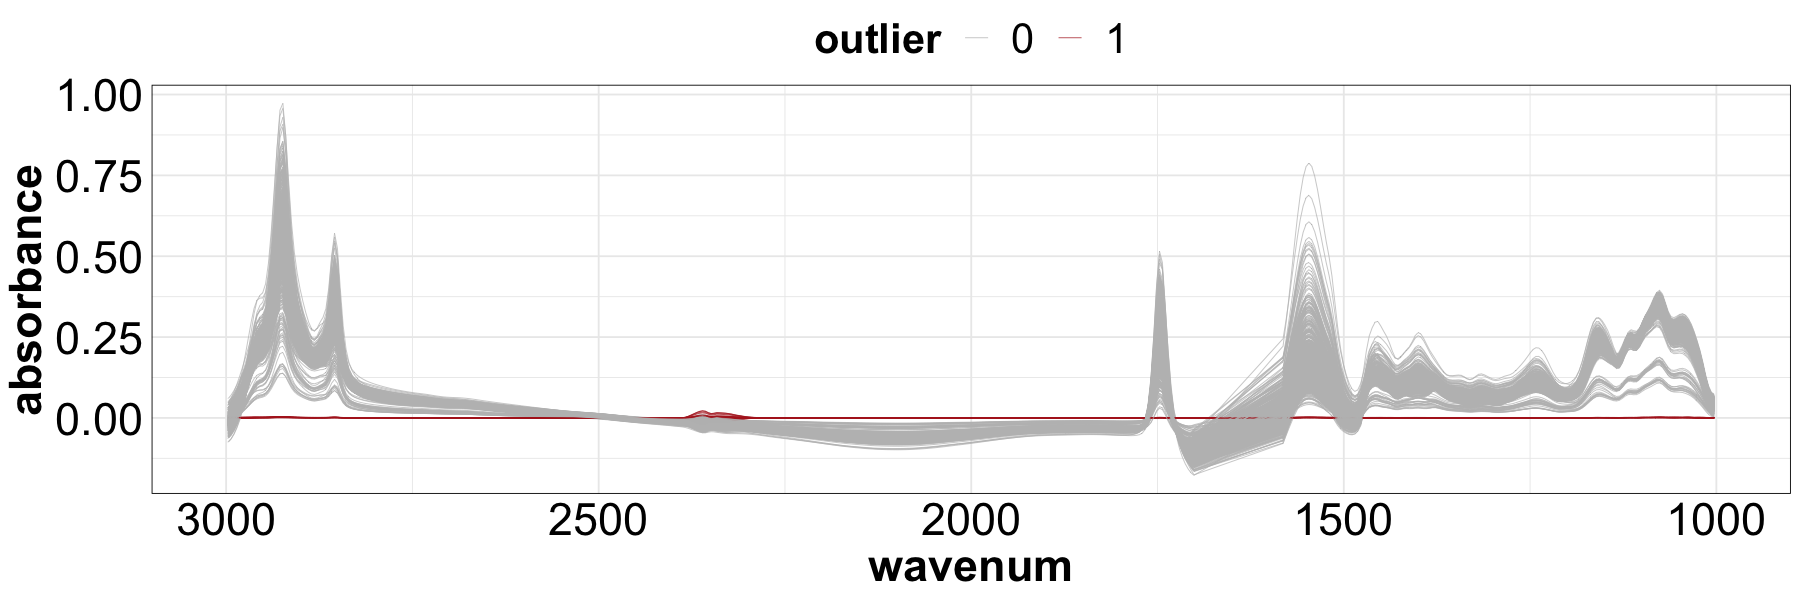

In [6]:
spc_d <- spc %>% filter(disease == 1)
spc_ds <- spc_d %>%
  select(which((as.numeric(colnames(spc_d)) > 1000) & 
               (as.numeric(colnames(spc_d)) < 3000) & 
               !(as.numeric(colnames(spc_d)) >= 1585 & as.numeric(colnames(spc_d)) <= 1700)))
maha <- mahalanobis(spc_ds, colMeans(spc_ds), cov(spc_ds), inverted = TRUE)
mahal <- list(maha)[[1]]
spc_ds$outlier <- as.character(ifelse(mahal > (mean(mahal)+5*sd(mahal)) | mahal < (mean(mahal)-5*sd(mahal)), 1, 0))
spc_ds$vial <- spc_d$vial
spc_ds <- gather(spc_ds, key = "wavenum", value = "absorbance", -vial, -outlier)
spc_ds$wavenum <- as.numeric(spc_ds$wavenum)

options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(spc_ds, aes(x = wavenum, y = absorbance, fill = vial, color = outlier)) + 
    scale_color_manual(values = c("grey", "FireBrick")) + 
    geom_line(position = position_dodge(0.1), size = 0.2) +
    scale_x_reverse() +
    xlim(3000, 1000) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 27), 
    axis.title.x = element_text(face = "bold", size = 27), 
    axis.text.y = element_text(colour = "black", size = 27), 
    axis.text.x = element_text(colour = "black", size = 27), 
    legend.position = "top", 
    legend.title = element_text(size = 25, colour = "black", face = "bold"), 
    legend.text = element_text(size = 25, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

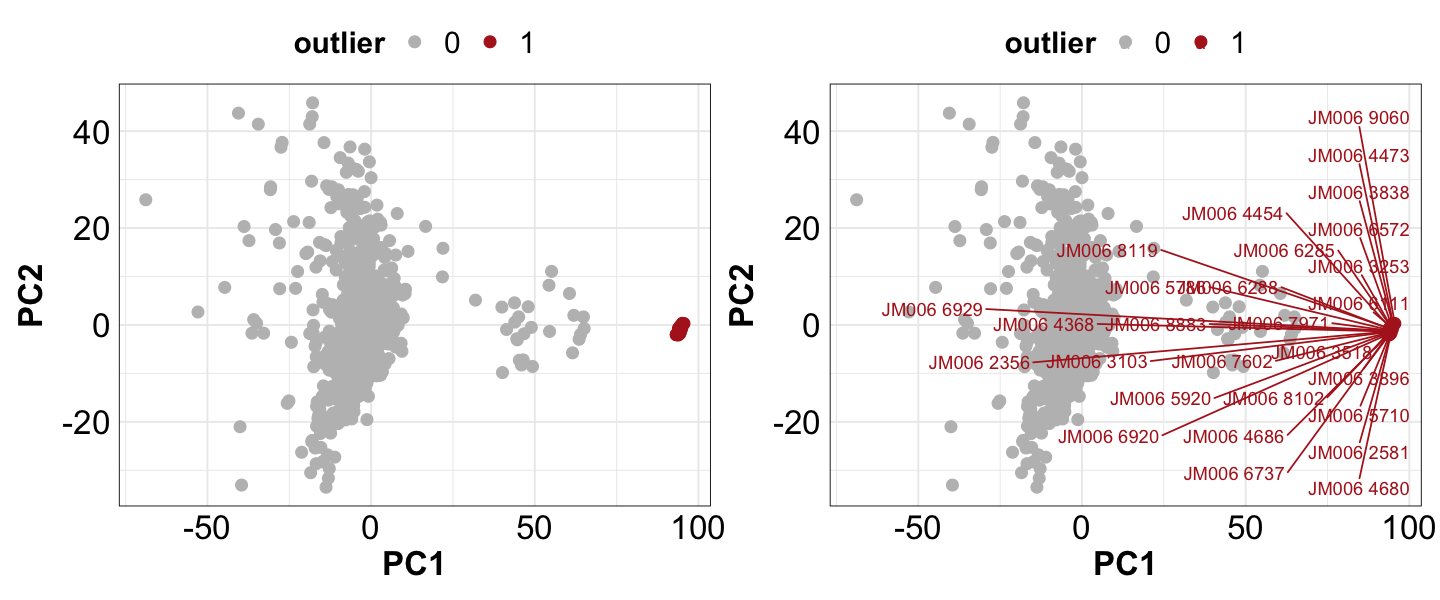

In [8]:
spc_d <- spc %>% filter(disease == 1)
spc_ds <- spc_d %>%
  select(which((as.numeric(colnames(spc_d)) > 1000) & 
               (as.numeric(colnames(spc_d)) < 3000) & 
               !(as.numeric(colnames(spc_d)) >= 1585 & as.numeric(colnames(spc_d)) <= 1700)))
maha <- mahalanobis(spc_ds, colMeans(spc_ds), cov(spc_ds), inverted = TRUE)
mahal <- list(maha)[[1]]
spc_ds$outlier <- as.character(ifelse(mahal > (mean(mahal)+5*sd(mahal)) | mahal < (mean(mahal)-5*sd(mahal)), 1, 0))

data.pca <- prcomp(spc_ds[, 1:487], center = TRUE, scale. = TRUE)
pca <- as.data.frame(data.pca$x[,1:2])
pca$outlier <- spc_ds$outlier
pca$vial <- spc_d$vial

p1 <- ggplot(pca, aes(x = PC1, y = PC2, color = outlier)) + 
geom_point(size = 3, aes(colour = outlier)) + 
    scale_color_manual(values = c("grey", "FireBrick")) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 20), 
    axis.title.x = element_text(face = "bold", size = 20), 
    axis.text.y = element_text(colour = "black", size = 20), 
    axis.text.x = element_text(colour = "black", size = 20), 
    legend.position = "top", 
    legend.title = element_text(size = 18, colour = "black", face = "bold"), 
    legend.text = element_text(size = 18, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

p2 <- ggplot(pca, aes(x = PC1, y = PC2, color = outlier)) + 
geom_point(size = 3, aes(colour = outlier)) + 
geom_text_repel(data = pca[pca$outlier == 1, ], aes(label = vial), box.padding = 0.5, max.overlaps = Inf) +
    scale_color_manual(values = c("grey", "FireBrick")) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 20), 
    axis.title.x = element_text(face = "bold", size = 20), 
    axis.text.y = element_text(colour = "black", size = 20), 
    axis.text.x = element_text(colour = "black", size = 20), 
    legend.position = "top", 
    legend.title = element_text(size = 18, colour = "black", face = "bold"), 
    legend.text = element_text(size = 18, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

options(repr.plot.width = 12, repr.plot.height = 5)
p1 + p2

#### Identify potential outliers in Health group

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


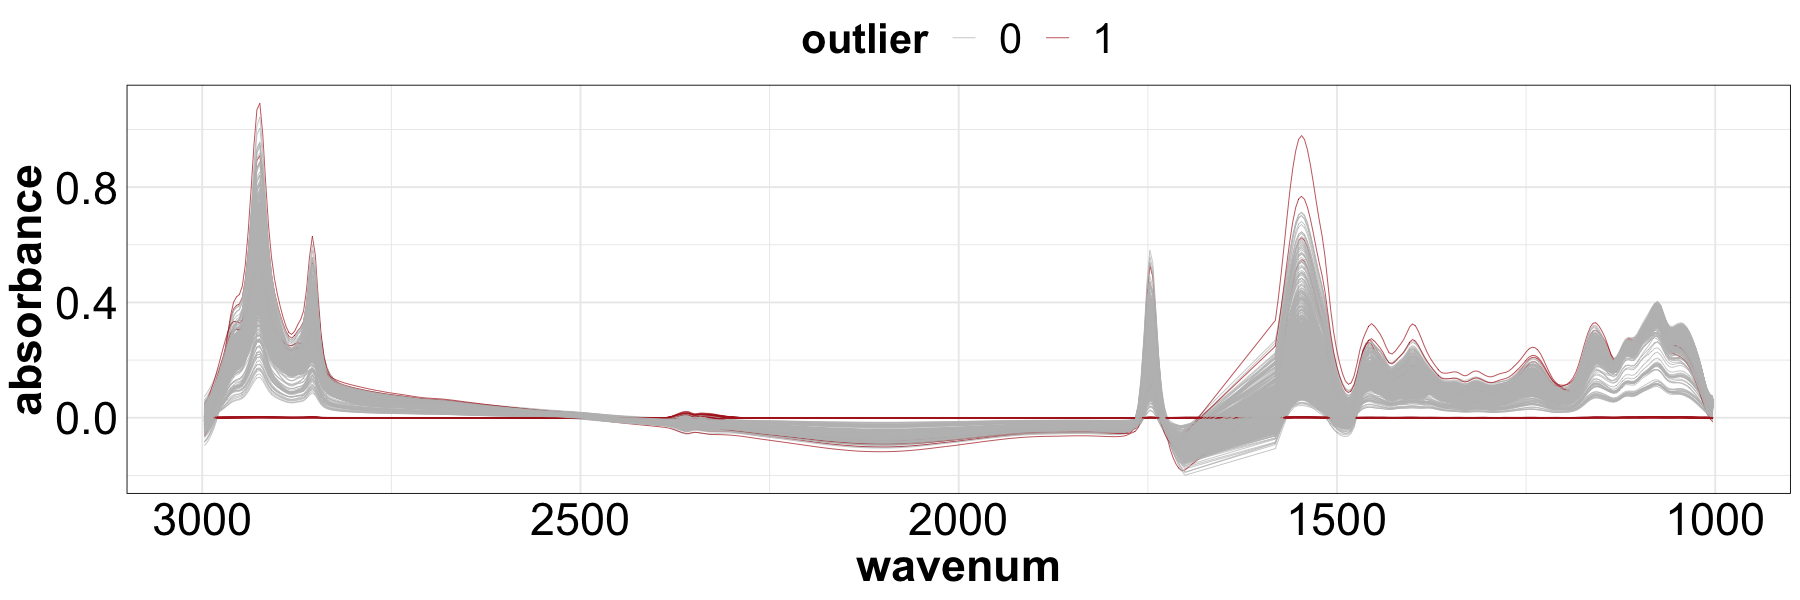

In [9]:
spc_h <- spc %>% filter(disease == 0)
spc_hs <- spc_h %>%
  select(which((as.numeric(colnames(spc_h)) > 1000) & 
               (as.numeric(colnames(spc_h)) < 3000) & 
               !(as.numeric(colnames(spc_h)) >= 1585 & as.numeric(colnames(spc_h)) <= 1700)))
maha <- mahalanobis(spc_hs, colMeans(spc_hs), cov(spc_hs), inverted = TRUE)
mahal <- list(maha)[[1]]
spc_hs$outlier <- as.character(ifelse(mahal > (mean(mahal)+5*sd(mahal)) | mahal < (mean(mahal)-5*sd(mahal)), 1, 0))
spc_hs$vial <- spc_h$vial
spc_hs <- gather(spc_hs, key = "wavenum", value = "absorbance", -vial, -outlier)
spc_hs$wavenum <- as.numeric(spc_hs$wavenum)

options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(spc_hs, aes(x = wavenum, y = absorbance, fill = vial, color = outlier)) + 
    scale_color_manual(values = c("grey", "FireBrick")) + 
    geom_line(position = position_dodge(0.1), size = 0.2) +
    scale_x_reverse() +
    xlim(3000, 1000) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 27), 
    axis.title.x = element_text(face = "bold", size = 27), 
    axis.text.y = element_text(colour = "black", size = 27), 
    axis.text.x = element_text(colour = "black", size = 27), 
    legend.position = "top", 
    legend.title = element_text(size = 25, colour = "black", face = "bold"), 
    legend.text = element_text(size = 25, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

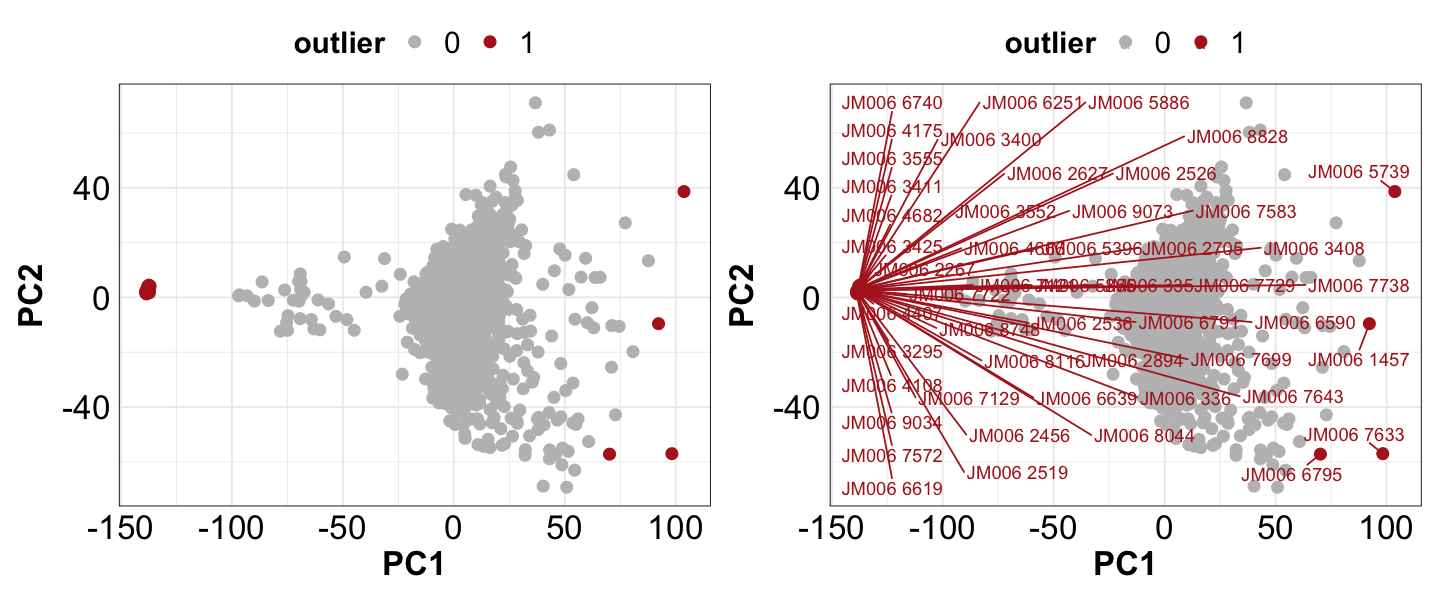

In [45]:
spc_h <- spc %>% filter(disease == 0)
spc_hs <- spc_h %>%
  select(which((as.numeric(colnames(spc_h)) > 1000) & 
               (as.numeric(colnames(spc_h)) < 3000) & 
               !(as.numeric(colnames(spc_h)) >= 1585 & as.numeric(colnames(spc_h)) <= 1700)))
maha <- mahalanobis(spc_hs, colMeans(spc_hs), cov(spc_hs), inverted = TRUE)
mahal <- list(maha)[[1]]
spc_hs$outlier <- as.character(ifelse(mahal > (mean(mahal)+5*sd(mahal)) | mahal < (mean(mahal)-5*sd(mahal)), 1, 0))

data.pca <- prcomp(spc_hs[, 1:487], center = TRUE, scale. = TRUE)
pca <- as.data.frame(data.pca$x[,1:2])
pca$outlier <- spc_hs$outlier
pca$vial <- spc_h$vial

p1 <- ggplot(pca, aes(x = PC1, y = PC2, color = outlier)) + 
geom_point(size = 3, aes(colour = outlier)) + 
    scale_color_manual(values = c("grey", "FireBrick")) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 20), 
    axis.title.x = element_text(face = "bold", size = 20), 
    axis.text.y = element_text(colour = "black", size = 20), 
    axis.text.x = element_text(colour = "black", size = 20), 
    legend.position = "top", 
    legend.title = element_text(size = 18, colour = "black", face = "bold"), 
    legend.text = element_text(size = 18, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

p2 <- ggplot(pca, aes(x = PC1, y = PC2, color = outlier)) + 
geom_point(size = 3, aes(colour = outlier)) + 
geom_text_repel(data = pca[pca$outlier == 1, ], aes(label = vial), box.padding = 0.5, max.overlaps = Inf) +
    scale_color_manual(values = c("grey", "FireBrick")) +
    theme_minimal() + 
    theme(
    strip.text = element_text(size = 20),
    axis.title.y = element_text(face = "bold", size = 20), 
    axis.title.x = element_text(face = "bold", size = 20), 
    axis.text.y = element_text(colour = "black", size = 20), 
    axis.text.x = element_text(colour = "black", size = 20), 
    legend.position = "top", 
    legend.title = element_text(size = 18, colour = "black", face = "bold"), 
    legend.text = element_text(size = 18, colour = "black"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key = element_blank()) 

options(repr.plot.width = 12, repr.plot.height = 5)
p1 + p2